In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
v5 = pd.read_csv('/Users/charliechou/Downloads/Spare-it V5 scale records Jan 1 to Oct 16 2023-001.csv')
cds = pd.read_excel('/Users/charliechou/Downloads/fullness-assessments CCDS as of Oct 13 2023.xlsx')

# v5

In [6]:
v5.info()










<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26979124 entries, 0 to 26979123
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   createdat   object 
 1   iotid       object 
 2   hide        bool   
 3   bin         object 
 4   errorcode   object 
 5   weight      float64
 6   battery     float64
 7   updatedat   object 
 8   weightdiff  float64
 9   year        int64  
 10  month       int64  
 11  day         int64  
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 2.2+ GB


In [7]:
v5.head()

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
0,2023-01-02 12:41:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.017395,2023-01-02 12:41:00.000,NaN,2023,1,2
1,2023-01-02 13:02:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.101854,2023-01-02 13:02:00.000,NaN,2023,1,2
2,2023-01-02 13:53:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.169986,2023-01-02 13:53:00.000,NaN,2023,1,2
3,2023-01-02 16:30:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.559625,2023-01-02 16:30:00.000,NaN,2023,1,2
4,2023-01-02 16:39:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2594.186313,2023-01-02 16:39:00.000,NaN,2023,1,2


In [9]:
v5.describe()

,weight,battery,weightdiff,year,month,day
count,2.697912e+07,2.697912e+07,0.0,26979124.0,2.697912e+07,2.697912e+07
mean,3.965010e+03,2.891115e+03,NaN,2023.0,5.119058e+00,1.541971e+01
std,7.578254e+03,1.583904e+02,NaN,0.0,2.526648e+00,8.707518e+00
min,-1.000000e+05,1.334859e+03,NaN,2023.0,1.000000e+00,1.000000e+00
25%,7.644770e+02,2.860304e+03,NaN,2023.0,3.000000e+00,8.000000e+00
50%,2.128634e+03,2.917983e+03,NaN,2023.0,5.000000e+00,1.500000e+01
75%,4.618906e+03,2.974899e+03,NaN,2023.0,7.000000e+00,2.300000e+01
max,1.000000e+05,3.251240e+03,NaN,2023.0,1.000000e+01,3.100000e+01


In [10]:
missing_values = v5.isna().sum()
missing_values

createdat            0
iotid                0
hide                 0
bin                  0
errorcode            0
weight               0
battery              0
updatedat            0
weightdiff    26979124
year                 0
month                0
day                  0
dtype: int64

In [79]:
len(v5[v5.hide==1])


213947

In [80]:
v5 = v5[v5.hide==0]

In [81]:
print(f'Number of scales:{len(v5.iotid.unique())}')
print(f'Number of bins:{len(v5.bin.unique())}')

Number of scales:1086
Number of bins:1186


In [63]:
v5.bin.value_counts().sort_values(ascending=True)

bin
cc839327-7806-49cb-8fa6-19391570065a        20
fc67ba54-64df-47ac-bd15-019414ba2483       101
1595ad8a-7fbe-487f-88e1-f25001a0becd       102
578aa921-5dfb-4a95-a97e-a96b88b0ad4b       192
a68ab306-a1c9-467d-a1dd-f080e675b45c       231
                                         ...  
d76953e9-3f48-4900-8c12-1b85a777360f    271038
8c9ae9cf-89ba-4dc4-95a6-cacba215b27a    274660
e89c0fc0-e814-4bb7-884a-b8cc1345a4ce    377254
95171614-b019-4eb9-b726-0af6674a9451    445484
09b1ece7-5aaa-4c66-a89a-ac6a99bae6ed    468728
Name: count, Length: 1188, dtype: int64

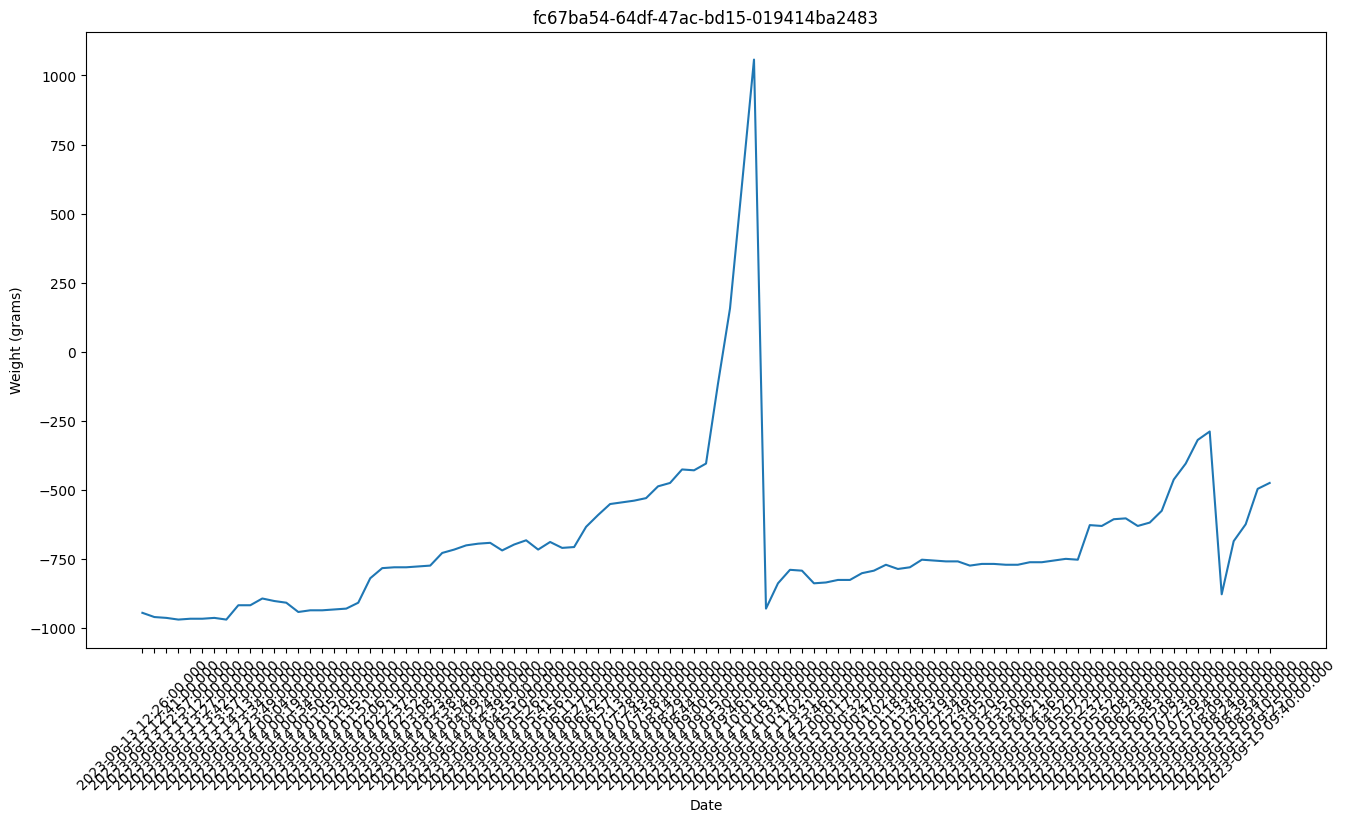

In [89]:


bin_data = v5[v5['bin'] == 'fc67ba54-64df-47ac-bd15-019414ba2483'].sort_values(by='updatedat',ascending=True)

plt.figure(figsize=(16,8))
sns.lineplot(x='updatedat', y='weight', data=bin_data)
plt.title(f'fc67ba54-64df-47ac-bd15-019414ba2483')
plt.xlabel('Date')
plt.ylabel('Weight (grams)')
plt.xticks(rotation=45)
plt.show()


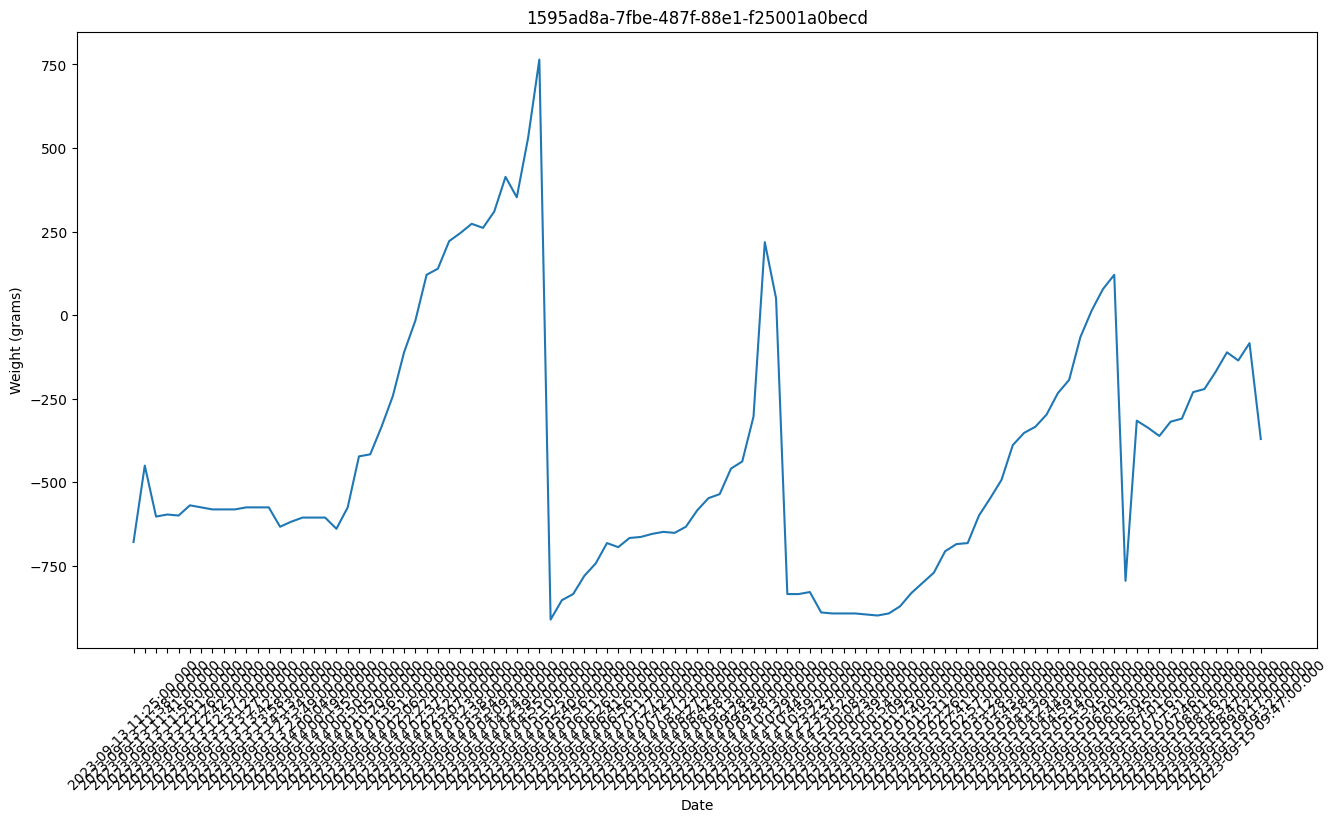

In [93]:

bin_data = v5[v5['bin'] == '1595ad8a-7fbe-487f-88e1-f25001a0becd'].sort_values(by='updatedat',ascending=True)

plt.figure(figsize=(16,8))
sns.lineplot(x='updatedat', y='weight', data=bin_data)
plt.title('1595ad8a-7fbe-487f-88e1-f25001a0becd')
plt.xlabel('Date')
plt.ylabel('Weight (grams)')
plt.xticks(rotation=45)
plt.show()

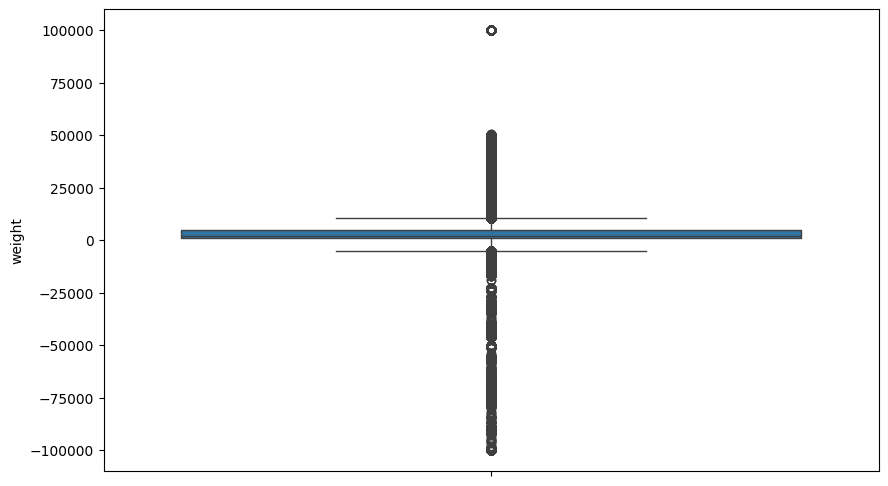

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(v5['weight'])
plt.show()

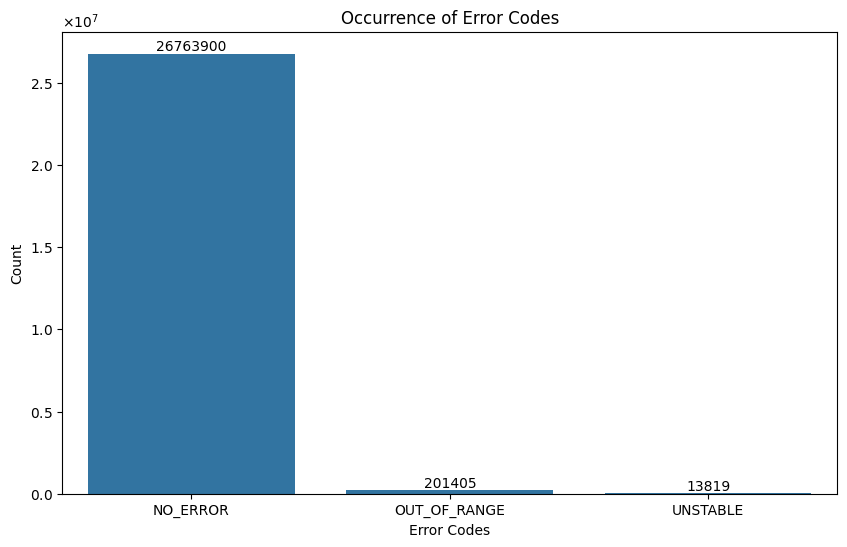

In [31]:
from matplotlib.ticker import ScalarFormatter

error_counts = v5['errorcode'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=error_counts.index, y=error_counts.values)
plt.title('Occurrence of Error Codes')
plt.xlabel('Error Codes')
plt.ylabel('Count')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
for i, count in enumerate(error_counts.values):
    ax.text(i, count, count, ha='center', va='bottom')

plt.show()


Text(0, 0.5, 'grams')

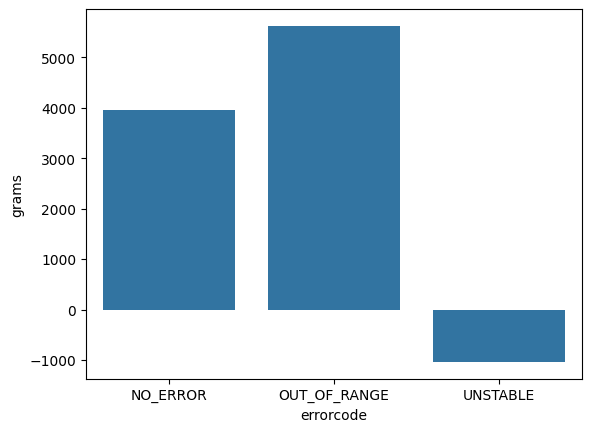

In [38]:
avg_weight = v5.groupby('errorcode')['weight'].mean()
sns.barplot(x=avg_weight.index,y=avg_weight.values)
plt.ylabel('grams')

# cds

In [41]:
cds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bin          1129 non-null   object
 1   date         1129 non-null   object
 2   account      1129 non-null   object
 3   building     1129 non-null   object
 4   floor        1129 non-null   object
 5   stationName  1129 non-null   object
 6   binName      1129 non-null   object
 7   category     1129 non-null   object
 8   fullness     1129 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 79.5+ KB


In [44]:
cds.describe()

,fullness
count,1129.000000
mean,33.170948
std,25.558444
min,0.000000
25%,10.000000
50%,20.000000
75%,50.000000
max,100.000000


In [39]:
cds.head()

,bin,date,account,building,floor,stationName,binName,category,fullness
0,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-09-13T15:35:37-04:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,10
1,594843cf-7be5-4a8f-b6c6-c1dc1f1ee956,2023-09-13T15:35:37-04:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BR,Mixed Recycling,20
2,65fdffd5-af50-4157-adfa-582251a1b27d,2023-09-13T15:35:37-04:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BT,Trash,10
3,a8af7a97-eb80-4b93-93b7-b517b153e133,2023-09-13T15:18:31-04:00,BU CCDS,Center for Computing & Data Sciences,01,CCBU01B,CCBU01BC,Compost,10
4,684d7454-1c8f-48cf-832f-e4823b4edfe3,2023-09-13T15:18:31-04:00,BU CCDS,Center for Computing & Data Sciences,01,CCBU01B,CCBU01BR,Mixed Recycling,50


In [116]:
missing_values = cds.isna().sum()
missing_values

bin            0
date           0
account        0
building       0
floor          0
stationName    0
binName        0
category       0
fullness       0
dtype: int64

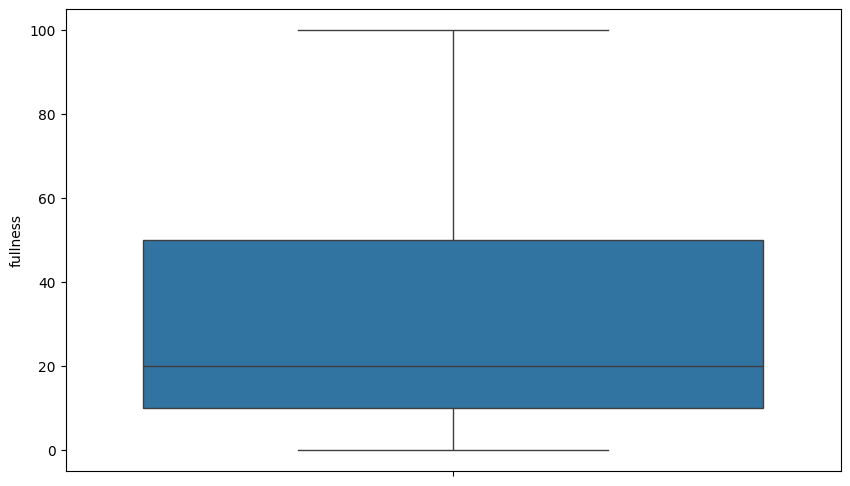

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(cds['fullness'])
plt.show()

Text(0.5, 0, 'Category')

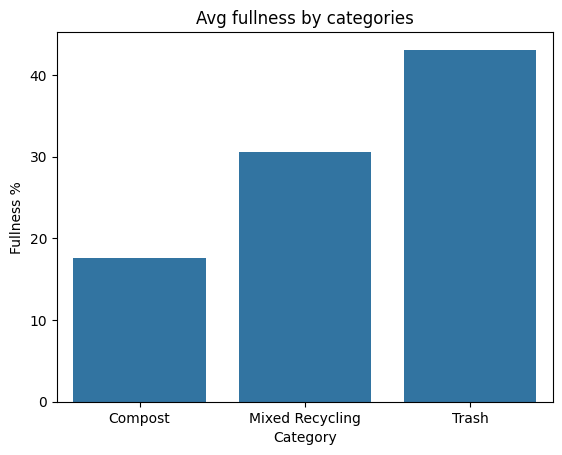

In [73]:
avg_full = cds.groupby('category')['fullness'].mean()
sns.barplot(avg_full)
plt.title('Avg fullness by categories')
plt.ylabel('Fullness %')
plt.xlabel('Category')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, '00 Lower Level'),
  Text(1, 0, '01'),
  Text(2, 0, '02'),
  Text(3, 0, '03'),
  Text(4, 0, '04'),
  Text(5, 0, '05'),
  Text(6, 0, '06'),
  Text(7, 0, '07'),
  Text(8, 0, '08'),
  Text(9, 0, '09'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

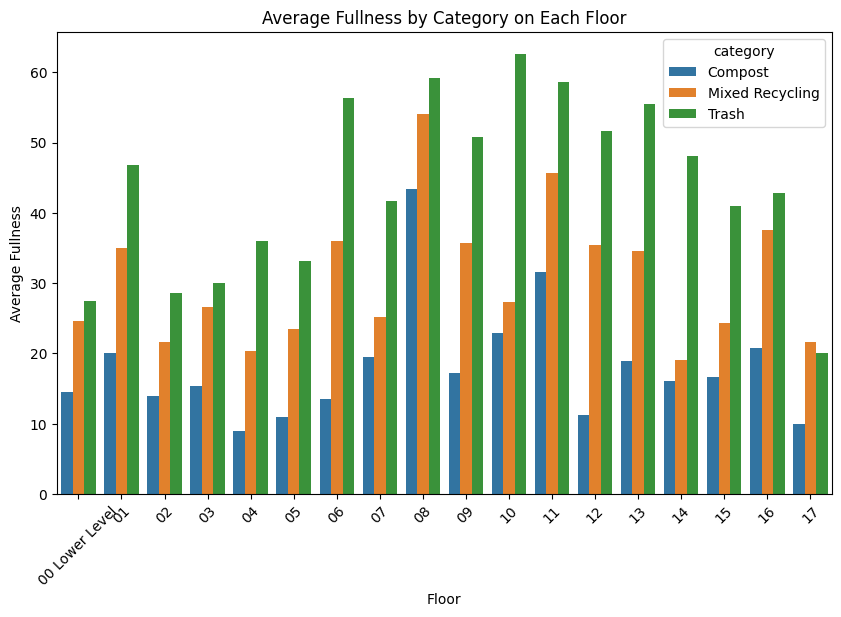

In [113]:
avg_full_cat = cds.groupby(['floor', 'category'])['fullness'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_full_cat, x='floor', y='fullness', hue='category')
plt.xlabel('Floor')
plt.ylabel('Average Fullness')
plt.title('Average Fullness by Category on Each Floor')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, '00 Lower Level'),
  Text(1, 0, '01'),
  Text(2, 0, '02'),
  Text(3, 0, '03'),
  Text(4, 0, '04'),
  Text(5, 0, '05'),
  Text(6, 0, '06'),
  Text(7, 0, '07'),
  Text(8, 0, '08'),
  Text(9, 0, '09'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

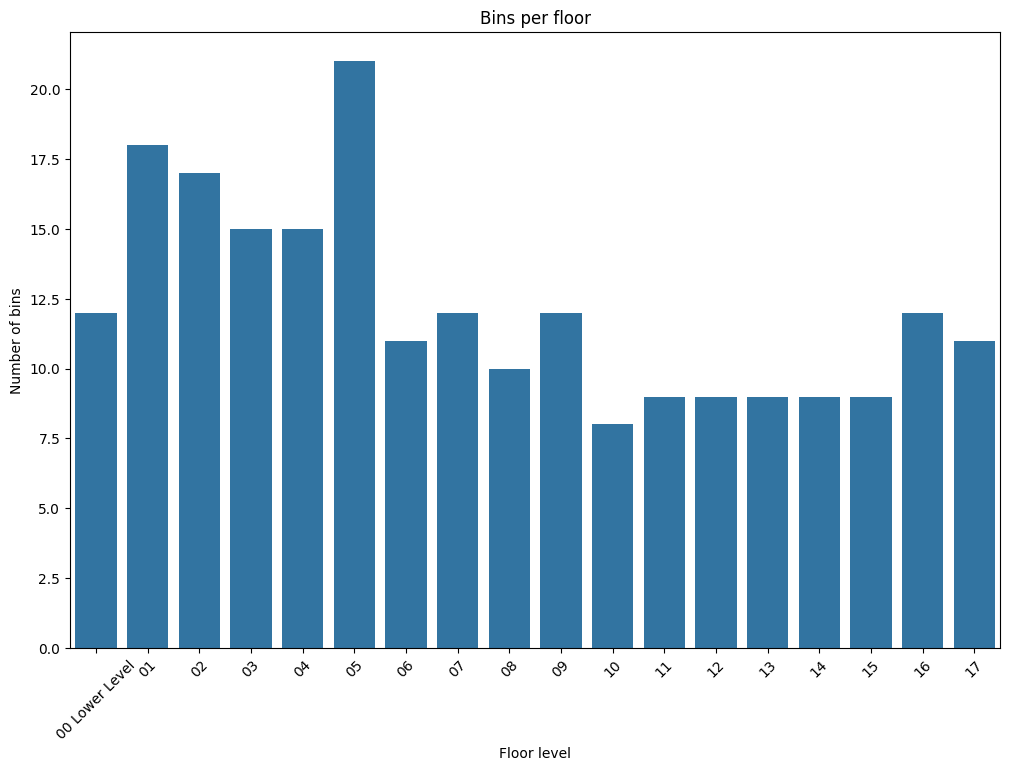

In [106]:
bins_per_floor = cds.groupby('floor')['bin'].nunique()
plt.figure(figsize=(12,8))
sns.barplot(bins_per_floor)
plt.title('Bins per floor')
plt.ylabel('Number of bins')
plt.xlabel('Floor level')
plt.xticks(rotation=45)

